# To improve my understanding of data handling with Python and Numpy I will be doing this weather data project.

## Numpy library of SciPY stack has functions which help to manage data in array form. I will load NOAA station and temperature data from text files. Plot them visually to understand insights from the data. I will be doing comparison's with different locations and parameters.

In [207]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn       # matplotlib extension to improve ploting

In [208]:
%matplotlib inline

I will be using weather data from NOAA National centres for Environmental Information https://www.ncdc.noaa.gov/
From there I will use GCOS Surface Network data.

In [209]:
import urllib.request
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt','stations.txt')

('stations.txt', <email.message.Message at 0x1be95c90>)

In [210]:
open('stations.txt','r').readlines()[:20]

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218\n',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930\n',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938\n',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948\n',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990\n',
 'AG000060390  36.7167    3.2500   24.0    ALGER-DAR EL BEIDA             GSN   

To sanitize the data as we only need data from the weather stations. That is we will only use the one with GSN in 6th column

In [211]:
stations = {}
for lines in open('stations.txt','r'):
    if 'GSN' in lines:
        fields = lines.split() # split by white space
        stations[fields[0]] = ' '.join(fields[4:])

In [212]:
def locateStation(s):
    found = {locate: name for locate,name in stations.items() if s in name}
    print(found)

In [213]:
locateStation('SAN DIEGO')

{'USW00023188': 'CA SAN DIEGO LINDBERGH FLD GSN 72290'}


In [214]:
locateStation('DELHI')

{'IN022021900': 'NEW DELHI/SAFDARJUN GSN 42182'}


In [215]:
locateStation('BARCELONA')

{'SP000008181': 'BARCELONA/AEROPUERTO GSN 08181'}


In [216]:
locateStation('BEIJING')

{'CHM00054511': 'BEIJING GSN 54511'}


In [217]:
dataStations = ['USW00023188','IN022021900','SP000008181','CHM00054511']

In [218]:
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/gsn/USW00023188.dly','USW00023188.dly')
open('USW00023188.dly', 'r').readlines()[:3]

['USW00023188193907TMAX  244  0  233  0  217  0  217  0  222  0  222  0  239  0  239  0  244  0  244  0  267  0  261  0  228  0  233  0  217  0  211  0  206  0  222  0  233  0  233  0  250  0  244  0  244  0  256  0  261  0  256  0  239  0  250  0  239  0  244  0  244  0\n',
 'USW00023188193907TMIN  172  0  183  0  167  0  172  0  178  0  183  0  161  0  172  0  183  0  183  0  172  0  178  0  172  0  167  0  156  0  150  0  156  0  167  0  156  0  189  0  172  0  178  0  178  0  183  0  194  0  178  0  178  0  172  0  183  0  183  0  189  0\n',
 'USW00023188193907PRCP    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0T 0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0\n']

In [219]:
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/gsn/IN022021900.dly','IN022021900.dly')
open('IN022021900.dly', 'r').readlines()[:3]

['IN022021900190101PRCP   79  I    0  I    0  I    0  I    0  I    0  I    0  I    5  I   41  I    0  I    0  I    0  I   18  I  130  I   25  I    0  I    0  I    0  I    0  I   20  I   25  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I\n',
 'IN022021900190102PRCP    0  I    0  I    0  I    0  I    5  I    5  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I   51  I   30  I    0  I    0  I   41  I    0  I    0  I    0  I    0  I    0  I    0  I-9999   -9999   -9999   \n',
 'IN022021900190103PRCP    0  I    0  I    0  I    0  I    0  I    0  I   46  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I   97  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I\n']

In [220]:
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/gsn/SP000008181.dly','SP000008181.dly')
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/gsn/CHM00054511.dly','CHM00054511.dly')

('CHM00054511.dly', <email.message.Message at 0x1be99af0>)

### Data cleaning and Required data will be taken from .dly files. Readme file contains all legends.

In [221]:
open('readme.txt','r').readlines()[65:89]

['------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n',
 'QFLAG2       36-36   Character\n',
 'SFLAG2       37-37   Character\n',
 '  .           .          .\n',
 '  .           .          .\n',
 '  .           .          .\n',
 'VALUE31    262-266   Integer\n',
 'MFLAG31    267-267   Character\n',
 'QFLAG31    268-268   Character\n',
 'SFLAG31    269-269   Character\n',
 '------------------------------\n',
 '\n']

In [222]:
# this function return the Numpy array of the record
def parseFile(filename):
    return np.genfromtxt(filename, delimiter = dly_delimiter,
                                   usecols = dly_usecolumns,
                                   dtype = dly_dtype,
                                   names = dly_names)

In [223]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31   # describing the size of columns which we will use
dly_usecolumns = [1,2,3] + [4*i for i in range(1,32)]  # year,month,element and all values 4,8,12 th columns
dly_dtype = [np.int32, np.int32, (np.str_,4)] + [np.int32] * 31
dly_names = ['year', 'month', 'observation'] + [str(day) for day in range(1,31+1)]

In [224]:
beijing = parseFile('CHM00054511.dly')

In [225]:
beijing

array([(1945, 10, 'TAVG', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,    96),
       (1945, 11, 'TAVG',   116,   116,    97,   119,   126,    93,   105,   102,   114,   100,    46,    77,    83,    76,    63,    79,    82,    88,    56,    63,    38,    22,    34,    45,    68,    61,    18,     7,     6,   -25, -9999),
       (1945, 12, 'TAVG',    -7,    38,    31,    12,    37,    50,     4, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,    -9,    -8,   -37,   -45,   -27,   -12,   -27,   -74,   -72,   -54,   -61,   -67),
       ...,
       (2020,  1, 'PRCP',     0,     0,     0,     0,    48,     3,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2020

Crearting a numpy array for better access to data

In [226]:
def transform(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [227]:
transform(beijing[0])

array([('1945-10-01', -999.9), ('1945-10-02', -999.9),
       ('1945-10-03', -999.9), ('1945-10-04', -999.9),
       ('1945-10-05', -999.9), ('1945-10-06', -999.9),
       ('1945-10-07', -999.9), ('1945-10-08', -999.9),
       ('1945-10-09', -999.9), ('1945-10-10', -999.9),
       ('1945-10-11', -999.9), ('1945-10-12', -999.9),
       ('1945-10-13', -999.9), ('1945-10-14', -999.9),
       ('1945-10-15', -999.9), ('1945-10-16', -999.9),
       ('1945-10-17', -999.9), ('1945-10-18', -999.9),
       ('1945-10-19', -999.9), ('1945-10-20', -999.9),
       ('1945-10-21', -999.9), ('1945-10-22', -999.9),
       ('1945-10-23', -999.9), ('1945-10-24', -999.9),
       ('1945-10-25', -999.9), ('1945-10-26', -999.9),
       ('1945-10-27', -999.9), ('1945-10-28', -999.9),
       ('1945-10-29', -999.9), ('1945-10-30', -999.9),
       ('1945-10-31',    9.6)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [228]:
def getValues(filename,observation):
    
    data = np.concatenate([transform(row) for row in parseFile(filename) if row[2] == observation])
    data['value'][data['value'] == -999.9] = np.nan
    return data

In [229]:
beijing_tMax = getValues('CHM00054511.dly','TMAX')
beijing_tMin = getValues('CHM00054511.dly','TMIN')

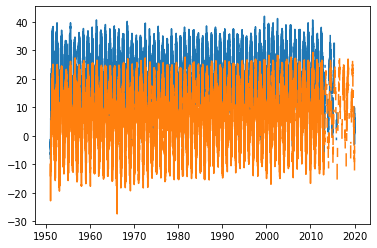

In [230]:
pp.plot(beijing_tMax['date'], beijing_tMax['value'])
pp.plot(beijing_tMin['date'], beijing_tMin['value'])

In [231]:
# To make up for missing data add the closest neighbors through interopolation in Numpy
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])

In [232]:
fillnans(beijing_tMax)
fillnans(beijing_tMin)

In [233]:
np.mean(beijing_tMax['value']), np.mean(beijing_tMin['value'])

(17.835584047025602, 7.196716601276107)

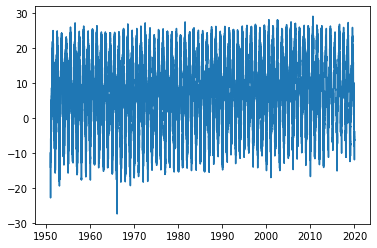

In [234]:
pp.plot(beijing_tMin['date'],beijing_tMin['value'])

In [235]:
def plot_smoothed(t,win=10):
    smoothed = np.correlate(t['value'],np.ones(win)/win,'same')
    
    pp.plot(t['date'],smoothed)

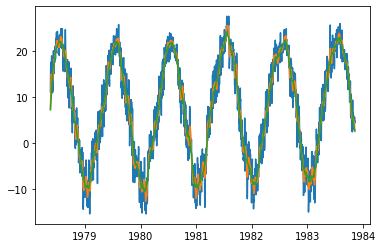

In [236]:
pp.plot(beijing_tMin[10000:12000]['date'],beijing_tMin[10000:12000]['value'])
# looking at small portion of smoothed graph
plot_smoothed(beijing_tMin[10000:12000])
plot_smoothed(beijing_tMin[10000:12000],30)

## Comparing all four cities

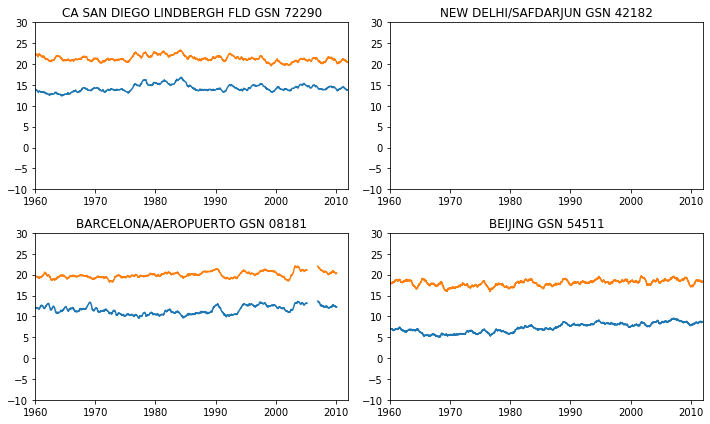

In [237]:
pp.figure(figsize=(10,6))

for i,code in enumerate(dataStations):
    pp.subplot(2,2,i+1)
    
    plot_smoothed(getValues('{}.dly'.format(code),'TMIN'),365)
    plot_smoothed(getValues('{}.dly'.format(code),'TMAX'),365)
    
    pp.title(stations[code])
    pp.axis(xmin=np.datetime64('1960'),xmax=np.datetime64('2012'),ymin=-10,ymax=30)

pp.tight_layout()

In [238]:
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [239]:
Barcelona_tMax = getValues('SP000008181.dly','TMAX')
Barcelona_tMin = getValues('SP000008181.dly','TMIN')

In [240]:
Sandiego_tmax = getValues('USW00023188.dly','TMAX')
Sandiego_tmin = getValues('USW00023188.dly','TMIN')

In [241]:
fillnans(Barcelona_tMax)
fillnans(Barcelona_tMin)
fillnans(Sandiego_tmax)
fillnans(Sandiego_tmin)

In [260]:
years = np.arange(1950,2014+1)

In [261]:
Sandiego_tMax_all = np.vstack([selectyear(Sandiego_tmax,year)[:365] for year in years])

In [262]:
Sandiego_mean = np.mean(Sandiego_tMax_all,axis=1)

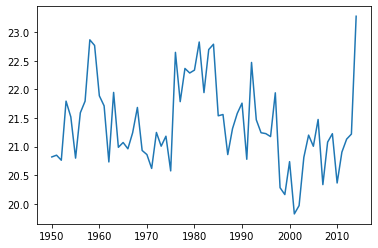

In [263]:
pp.plot(years,Sandiego_mean)

In [264]:
# to find coldest year
Sandiego_tmin_all = np.vstack([selectyear(Sandiego_tmin,year)[:365] for year in years])
Sandiego_coldest = years[np.argmin(Sandiego_mean)]
Sandiego_coldest

2001

In [265]:
Barcelona_tMax_all = np.vstack([selectyear(Barcelona_tMax,year)[:365] for year in years])

In [266]:
Barcelona_mean = np.mean(Barcelona_tMax_all, axis = 1)
Barcelona_warmest = years[np.argmax(Barcelona_mean)]

In [267]:
Barcelona_warmest

2003

Text(0.5, 1.0, '2003 in Barcelona vs. 2001 in San Diego')

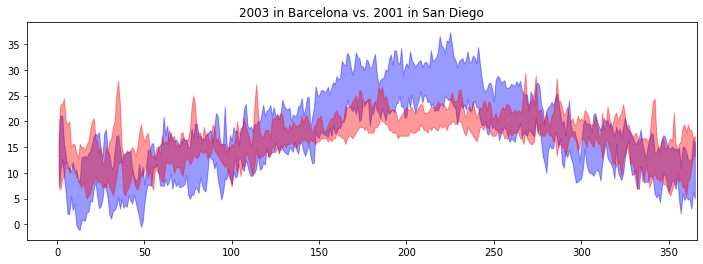

In [271]:
pp.figure(figsize=(12,4))

days = np.arange(1,365+1)

pp.fill_between(days,
                selectyear(Barcelona_tMin,Barcelona_warmest),
                selectyear(Barcelona_tMax,Barcelona_warmest),
                color='b',alpha=0.4)

pp.fill_between(days,
                selectyear(Sandiego_tmin,Sandiego_coldest),
                selectyear(Sandiego_tmax,Sandiego_coldest),
                color='r',alpha=0.4)

pp.axis(xmax=366)

pp.title('{} in Barcelona vs. {} in San Diego'.format(Barcelona_warmest,Sandiego_coldest))

# More to come